# Обучение модели и пайплайн данных

In [ ]:
from datetime import datetime
from typing import Dict, List, AnyStr
from collections import defaultdict
from pprint import pprint

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2
%matplotlib inline

pd.set_option('display.max_columns', None)

sns.set(style='whitegrid', palette='muted')

In [74]:
def split_by_am(df: pd.DataFrame, feature_type: str) -> Dict[AnyStr, List]:
    """Получение колонок для каждого эксгаустера"""
    if feature_type == 'x':
        x_cols = sorted(df.columns.to_list())
        split_dict = sorted([[col.split('. ')[0], col] for col in x_cols])
    elif feature_type == 'y':
        y_cols = sorted(df.columns.to_list())
        split_dict = sorted(
            [[col.split('_')[1].replace('А/М №', ''), col] for col in y_cols])
    else:
        return {}

    cols_dict = defaultdict(list)
    for k, v in split_dict:
        cols_dict[k].append(v)

    return dict(cols_dict)


def am_cols_count(x_data: dict, y_data: dict) -> pd.DataFrame:
    """Количество X, Y колонок для каждого эксгаустера"""
    x = [[col[0], len(col[1])] for col in x_data.items()]
    y = [[col[0], len(col[1])] for col in y_data.items()]
    x_data = pd.DataFrame(x, columns=['Machine', 'X column count'])
    y_data = pd.DataFrame(y, columns=['Machine', 'Y column count'])
    res = pd.merge(x_data, y_data, left_on='Machine', right_on='Machine')
    return res


def load_data_from_parquet(filename: str) -> pd.DataFrame:
    """Загрузка данных из паркета"""
    return pd.read_parquet(f'datasets/{filename}.parquet')


def fill_na(data: pd.DataFrame) -> pd.DataFrame:
    """Заполнение пропусков данных"""
    data = data.fillna(method='bfill') # temp method
    return data


def clean_m1(data: pd.DataFrame) -> pd.DataFrame:
    data = data.replace(1, 0)
    return data

def get_am_split_data(data: pd.DataFrame, cols: dict) -> List[pd.DataFrame]:
    """Данные по каждому эксгаустеру отдельно"""
    df_list = []
    for col in cols.values():
        df_list.append(data[col])
    
    return df_list

In [75]:
df_x = fill_na(load_data_from_parquet('X_train'))
df_y = clean_m1(fill_na(load_data_from_parquet('y_train')))

In [76]:
x_cols = split_by_am(df_x, 'x')
y_cols = split_by_am(df_y, 'y')
x_am_list = get_am_split_data(df_x, x_cols)
y_am_list = get_am_split_data(df_y, y_cols)

In [77]:
cols_count = am_cols_count(x_cols, y_cols)
cols_count.iloc[0]['X column count']

16

In [78]:
y_am_list[0]

,Y_ЭКСГАУСТЕР А/М №4_ВК 310С ВИБРОПРЕОБРАЗОВАТЕЛЬ ЭКСГ.№4 Т.1,Y_ЭКСГАУСТЕР А/М №4_ГСМ ЭКСГ. №4,Y_ЭКСГАУСТЕР А/М №4_ЗАДВИЖКА ЭКСГ. №4,Y_ЭКСГАУСТЕР А/М №4_ЗАП. И РЕГ. АРМАТУРА ЭКСГ.№4,Y_ЭКСГАУСТЕР А/М №4_КЛ1 ТР№4 ДО ЭД ЭКСГАУСТЕРА №4,Y_ЭКСГАУСТЕР А/М №4_КЛ2 ТР№4 ДО ЭД ЭКСГАУСТЕРА №4,Y_ЭКСГАУСТЕР А/М №4_МАСЛОНАСОС РАБОЧИЙ ЭКСГ. №4,Y_ЭКСГАУСТЕР А/М №4_МАСЛООХЛАДИТЕЛЬ М-05-1 ЭКСГ. №4,Y_ЭКСГАУСТЕР А/М №4_МАСЛОПРОВОДЫ ЭКСГ №4,Y_ЭКСГАУСТЕР А/М №4_ПОДШИПНИК ОПОРНО-УПОРНЫЙ ЭКСГ. №4,Y_ЭКСГАУСТЕР А/М №4_ПОДШИПНИК ОПОРНЫЙ ЭКСГ. №4,Y_ЭКСГАУСТЕР А/М №4_ПОДШИПНИК ОПОРНЫЙ №1 ЭКСГ. №4,Y_ЭКСГАУСТЕР А/М №4_ПОДШИПНИК ОПОРНЫЙ №2 ЭКСГ. №4,Y_ЭКСГАУСТЕР А/М №4_РЕДУКТОР ГАЗ. ЗАДВИЖКИ ЭКСГ. №4,Y_ЭКСГАУСТЕР А/М №4_РОТОР ЭКСГ. №4,Y_ЭКСГАУСТЕР А/М №4_ТИРИСТ. ВОЗБУДИТЕЛЬ ВТ-РЭМ-400 ЭКСГ4 ВУ1,Y_ЭКСГАУСТЕР А/М №4_ТР-Р ТМ-4000-10/6 ЭКСГ. №4,Y_ЭКСГАУСТЕР А/М №4_ТСМТ-101-010-50М-400 ТЕРМОПР.ПОДШ.Т.1,Y_ЭКСГАУСТЕР А/М №4_УЛИТА ЭКСГ. №4,Y_ЭКСГАУСТЕР А/М №4_ЭКСГАУСТЕР А/М №4,Y_ЭКСГАУСТЕР А/М №4_ЭЛ/ДВИГАТЕЛЬ ГАЗ. ЗАДВИЖКИ ЭКСГ. №4,Y_ЭКСГАУСТЕР А/М №4_ЭЛЕКТРОАППАРАТУРА ЭКСГ. №4,Y_ЭКСГАУСТЕР А/М №4_ЭЛЕКТРОДВИГАТЕЛЬ ДСПУ-140-84-4 ЭКСГ. №4
DT,,,,,,,,,,,,,,,,,,,,,,,
2019-01-16 13:21:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-16 13:21:10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-16 13:21:20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-16 13:21:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-16 13:21:40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 23:59:10,0.0,2.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,2.0
2021-12-31 23:59:20,0.0,2.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,2.0
2021-12-31 23:59:30,0.0,2.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,2.0


In [79]:
from sklearn.preprocessing import MinMaxScaler

idx = 0
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
# fit the format of the scaler -> convert shape from (1000, ) -> (1000, 1)
# counts = df_list[idx]['count'].rolling(
#     3, min_periods=1, center=True, win_type='cosine').mean().values.reshape(-1, 1)
input_x = x_am_list[idx].values.reshape(-1,
                                        cols_count.iloc[idx]['X column count'])
output_y = y_am_list[idx].values.reshape(-1,
                                         cols_count.iloc[idx]['Y column count'])
scaled_x = scaler_x.fit_transform(input_x)
scaled_y = scaler_y.fit_transform(output_y)


In [80]:
print(input_x.shape)
print(output_y.shape)

(9335034, 16)
(9335034, 23)


In [108]:
def split_into_sequences(data, seq_len):
    n_seq = len(data) - seq_len + 1
    return np.array([data[i:(i+seq_len)] for i in range(n_seq)])


def get_train_test(data_x, data_y, seq_len, train_frac):
    sequences = split_into_sequences(data_x, seq_len)
    n_train = int(sequences.shape[0] * train_frac)
    x_train = sequences[:n_train]
    x_test = sequences[n_train:]
    y_train = data_y[:n_train]
    y_test = data_y[n_train:]
    return x_train, y_train, x_test, y_test, n_train


x_train, y_train, x_test, y_test, n_train = get_train_test(
    scaled_x, scaled_y, 1, train_frac=0.9)

In [109]:
print(f'{x_train.shape=}')
print(f'{y_train.shape=}')
print(f'{x_test.shape=}')
print(f'{y_test.shape=}')
print(f'{n_train=}')


x_train.shape=(8401530, 1, 16)
y_train.shape=(8401530, 23)
x_test.shape=(933504, 1, 16)
y_test.shape=(933504, 23)
n_train=8401530


In [113]:
import random

import tensorflow
from tensorflow import keras
from tensorflow.keras import backend
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import (LSTM, Activation, BatchNormalization,
                                     Bidirectional, Dense, Dropout)
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
# from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential

In [141]:
# fraction of the input to drop; helps prevent overfitting
seq_len = 11
dropout = 0.2
# window_size = seq_len - 1
window_size = 1
lr = 0.001
lambd = 3e-2                         # lambda in L2 regularizaion
dp = 0.1                             # dropout rate
rdp = 0.0                            # recurrent dropout rate

model = keras.Sequential(  # type: ignore
    [
        LSTM(window_size, return_sequences=True,
             input_shape=(window_size, input_x.shape[-1]),
             activation='tanh', recurrent_activation='hard_sigmoid',
             kernel_regularizer=l2(), recurrent_regularizer=l2(),
             dropout=dp, recurrent_dropout=rdp),

        BatchNormalization(),

        # Dropout(rate=dropout),

        Bidirectional(LSTM((input_x.shape[-1] * 2), return_sequences=True,
                      kernel_regularizer=l2(), recurrent_regularizer=l2(),
                      dropout=dp, recurrent_dropout=rdp)),

        BatchNormalization(),

        # Dropout(rate=dropout),

        Bidirectional(LSTM((input_x.shape[-1] * 6), return_sequences=True,
                           kernel_regularizer=l2(), recurrent_regularizer=l2(),
                           dropout=dp, recurrent_dropout=rdp)),

        BatchNormalization(),

        # Dropout(rate=dropout),

        Bidirectional(LSTM((input_x.shape[-1] * 5), return_sequences=True,
                      kernel_regularizer=l2(), recurrent_regularizer=l2(),
                      dropout=dp, recurrent_dropout=rdp)),

        BatchNormalization(),

        Bidirectional(LSTM((input_x.shape[-1] * 3), return_sequences=True,
                      kernel_regularizer=l2(), recurrent_regularizer=l2(),
                      dropout=dp, recurrent_dropout=rdp)),

        BatchNormalization(),

        # Dropout(rate=dropout),

        Bidirectional(LSTM(input_x.shape[-1], return_sequences=False,
                      kernel_regularizer=l2(), recurrent_regularizer=l2(),
                      dropout=dp, recurrent_dropout=rdp)),

        BatchNormalization(),

        # Dropout(rate=dropout),

        # LSTM(window_size, return_sequences=False),

        Dense(units=output_y.shape[-1]),

        Activation('linear')
    ]
)


In [123]:
dropout = 0.2
window_size = seq_len - 1

model = keras.Sequential()

model.add(
    LSTM(window_size, return_sequences=True,
         input_shape=(window_size, x_train.shape[-1]))
)

model.add(Dropout(rate=dropout))
# Bidirectional allows for training of sequence data forwards and backwards
model.add(
    Bidirectional(LSTM((window_size * 2), return_sequences=True)
                  ))

model.add(Dropout(rate=dropout))

model.add(
    Bidirectional(LSTM((window_size * 4), return_sequences=True)
                  ))

model.add(Dropout(rate=dropout))

model.add(
    Bidirectional(LSTM(window_size * 3, return_sequences=False))
)

model.add(Dense(units=1))
# linear activation function: activation is proportional to the input
model.add(Activation('linear'))


In [140]:
del model
backend.clear_session()
tensorflow.compat.v1.reset_default_graph()
tensorflow.random.set_seed(random.randint(0,999999))

In [142]:
# sgd = keras.optimizers.SGD(momentum=0.9,
#                            nesterov=True)

# rms = keras.optimizers.experimental.RMSprop(learning_rate=0.1)


# early_stop = EarlyStopping(monitor='loss', min_delta=0.001,
#                            patience=15, verbose=1, mode='auto')

# Define a learning rate decay method:
lr_decay = ReduceLROnPlateau(monitor='loss',
                             patience=1, verbose=0,
                             factor=0.5, min_lr=1e-5)
# Define Early Stopping:
early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0,
                           patience=30, verbose=1, mode='auto',
                           baseline=0, restore_best_weights=True)


model.compile(
    loss='mean_squared_error',
    # optimizer='adam',
    # optimizer=sgd,
    # optimizer='sgd',
    # optimizer='nadam',
    optimizer=Adam(lr=lr),
    # optimizer='adadelta',
    # optimizer=rms,
    metrics=['accuracy']
)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 1)              72        
                                                                 
 batch_normalization (BatchN  (None, 1, 1)             4         
 ormalization)                                                   
                                                                 
 bidirectional (Bidirectiona  (None, 1, 64)            8704      
 l)                                                              
                                                                 
 batch_normalization_1 (Batc  (None, 1, 64)            256       
 hNormalization)                                                 
                                                                 
 bidirectional_1 (Bidirectio  (None, 1, 192)           123648    
 nal)                                                   

d:\Repos\forecast\env\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [143]:
batch_size = 256

history = model.fit(
    x_train,
    y_train,
    epochs=1,
    batch_size=batch_size,
    # batch_size=x_train.shape[0],
    shuffle=False,
    # validation_split=0.1,
    validation_data=(x_test, y_test),
    workers=8,
    use_multiprocessing=True,
    # callbacks=[early_stop]
    callbacks=[lr_decay, early_stop]
)


32819/32819 [==============================] - 2954s 90ms/step - loss: 0.0450 - accuracy: 0.3349 - val_loss: nan - val_accuracy: 0.0000e+00 - lr: 6.0000e-04


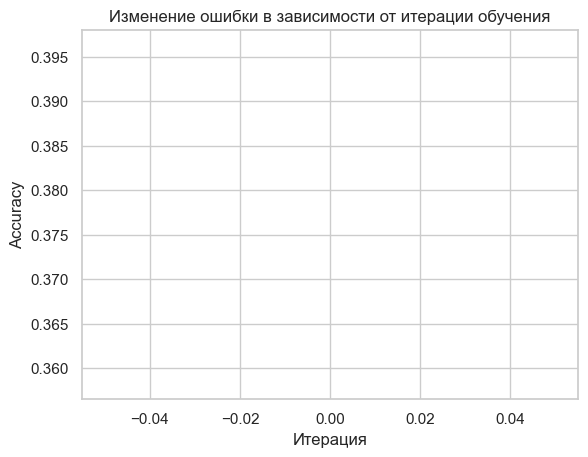

In [136]:
plt.title('Изменение ошибки в зависимости от итерации обучения')
plt.xlabel('Итерация')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy']);
# print(history.history)

In [144]:
model.evaluate(x_test, y_test)

29172/29172 [==============================] - 228s 8ms/step - loss: nan - accuracy: 0.0000e+00


[nan, 0.0]

In [ ]:
y_pred = model.predict(x_test)

# invert the scaler to get the absolute price data
y_test_orig = scaler_x.inverse_transform(y_test)
y_pred_orig = scaler_x.inverse_transform(y_pred)

# plots of prediction against actual data
plt.plot(y_test_orig, label='Real count', color='orange')
plt.plot(y_pred_orig, label='Predicted count', color='green')

plt.title('Pub count Prediction')
plt.xlabel('Years')
plt.ylabel('Count')
plt.legend(loc='best')

plt.show()

In [139]:
y_pred = model.predict(x_train[0:1])
pprint(scaler_x.inverse_transform(scaled_x[0:1]).tolist())
pprint([f'{round(i):f}' for i in scaler_y.inverse_transform(y_pred)[0].tolist()])


1/1 [==============================] - 2s 2s/step
[[1.5999999999999999,
  0.76,
  0.67,
  1.6299999999999997,
  3.4499999999999975,
  0.74,
  119.38499999999998,
  40.56,
  33.26,
  41.36999999999999,
  39.75000000000001,
  39.75,
  44.53854750000001,
  363.6766666666667,
  363.6766666666667,
  244.07800000000003]]
['0.000000',
 '0.000000',
 '0.000000',
 '0.000000',
 '2.000000',
 '2.000000',
 '0.000000',
 '0.000000',
 '0.000000',
 '2.000000',
 '2.000000',
 '0.000000',
 '0.000000',
 '0.000000',
 '2.000000',
 '0.000000',
 '2.000000',
 '0.000000',
 '2.000000',
 '0.000000',
 '0.000000',
 '0.000000',
 '0.000000']


In [127]:
y_pred = model.predict(x_train)
y_test_orig = scaler_y.inverse_transform(y_train)
y_pred_orig = scaler_y.inverse_transform(y_pred)


1/1 [==============================] - 1s 1s/step


In [138]:
model.save(filepath='severstal/tf_model_2_best/')


INFO:tensorflow:Assets written to: D:/Repos/forecast/severstal/tf_model_2_best/assets


INFO:tensorflow:Assets written to: D:/Repos/forecast/severstal/tf_model_2_best/assets
